### Building and Running a Graph

In [1]:
import tensorflow as tf

In [2]:
# two tensor constants
node1 = tf.constant(30, tf.float32)
node2 = tf.constant(4.0)

print(node1, node2) # outputs an abstract tensor

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


#### Creating Session

In [3]:
sess = tf.Session() # use resources such as CPU or GPU
print(sess.run([node1, node2]))
sess.close() # free up resources

[30.0, 4.0]


#### Other way to create session

In [4]:
with tf.Session() as sess:
    output = sess.run([node1, node2])
    print(output)

[30.0, 4.0]


### Visualizing computational graph using Tensorboard

This can be done by first creating a tf.summary.FileWriter object, passing the path of the directory where the information will be store that can be use by Tensorboard to create the graph

In [5]:
help(tf.summary.FileWriter)

Help on class FileWriter in module tensorflow.python.summary.writer.writer:

class FileWriter(SummaryToEventTransformer)
 |  Writes `Summary` protocol buffers to event files.
 |  
 |  The `FileWriter` class provides a mechanism to create an event file in a
 |  given directory and add summaries and events to it. The class updates the
 |  file contents asynchronously. This allows a training program to call methods
 |  to add data to the file directly from the training loop, without slowing down
 |  training.
 |  
 |  Method resolution order:
 |      FileWriter
 |      SummaryToEventTransformer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, logdir, graph=None, max_queue=10, flush_secs=120, graph_def=None, filename_suffix=None)
 |      Creates a `FileWriter` and an event file.
 |      
 |      On construction the summary writer creates a new event file in `logdir`.
 |      This event file will contain `Event` protocol buffers constructed when you
 |      cal

In [6]:
a = tf.constant(7.0)
b = tf.constant(5.0)

c = a * b

sess = tf.Session()

File_Writer = tf.summary.FileWriter('graph', sess.graph)

print(sess.run(c))

sess.close()

35.0


After executing the above code the present working directory will have a folder name **graph**. 
Now we need to go to the terminal and type: 
```bash 
tensorflow --logdir='graph' 
TensorBoard 0.1.5 at http://baka:6006 (Press CTRL+C to quit) 
```

Visit http://baka:6006. The graph looks something like this:

![Initial Graph](initial_graph.png)

#### Placeholder

In [7]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adder_node = a + b

sess = tf.Session()

print(sess.run(adder_node, {a:[4, 5], b:[2, 7]}))

sess.close()

[  6.  12.]


#### Variables

In [8]:
sess = tf.Session()

# Model Parameters
W = tf.Variable([0.0], tf.float32)
b = tf.Variable([0.0], tf.float32)

# Inputs and Outputs
x = tf.placeholder(tf.float32)

linear_model = W * x + b

y = tf.placeholder(tf.float32)

# Loss function
squared_error = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_error)

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(.01)
train = optimizer.minimize(loss)



# This will intialize the global variables
init = tf.global_variables_initializer()

sess.run(init) #Initializing global variables

# print(sess.run(loss, {x:[1, 2, 3, 4], y:[5, 8, 11, 14]}))

for i in range(1000):
    sess.run(train, {x:[1, 2, 3, 4], y:[5, 8, 11, 14]})

print(sess.run([W, b]))

sess.close()

[array([ 3.00000238], dtype=float32), array([ 1.99999309], dtype=float32)]


### Implementation of Naval Mine Identifier

In [9]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [10]:
dataset = pd.read_csv('sonar.csv')

In [11]:
dataset.shape

(207, 61)

In [12]:
dataset.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [13]:
X = dataset.iloc[:, :-1].values # matrix of features/independent variables

In [14]:
X[0]

array([ 0.0453,  0.0523,  0.0843,  0.0689,  0.1183,  0.2583,  0.2156,
        0.3481,  0.3337,  0.2872,  0.4918,  0.6552,  0.6919,  0.7797,
        0.7464,  0.9444,  1.    ,  0.8874,  0.8024,  0.7818,  0.5212,
        0.4052,  0.3957,  0.3914,  0.325 ,  0.32  ,  0.3271,  0.2767,
        0.4423,  0.2028,  0.3788,  0.2947,  0.1984,  0.2341,  0.1306,
        0.4182,  0.3835,  0.1057,  0.184 ,  0.197 ,  0.1674,  0.0583,
        0.1401,  0.1628,  0.0621,  0.0203,  0.053 ,  0.0742,  0.0409,
        0.0061,  0.0125,  0.0084,  0.0089,  0.0048,  0.0094,  0.0191,
        0.014 ,  0.0049,  0.0052,  0.0044])

In [15]:
Y = dataset.iloc[:, -1].values # dependent variables

In [16]:
Y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [17]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [18]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
Y = Y.reshape(-1, 1)

In [20]:
Y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [21]:
oneHotEncoder = OneHotEncoder(categorical_features=[0])
Y = oneHotEncoder.fit_transform(Y).toarray()

In [22]:
Y

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [24]:
len(X_train)

165

In [25]:
len(X_test)

42

In [26]:
Y_train

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,

#### Parameters and variables to work with Tensor

In [27]:
learningRate = 0.2
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print('n_dim: ', n_dim)
n_class = 2
model_save_path = os.getcwd()

n_dim:  60


#### Defining layers and neurons for multi-layer perceptron

In [28]:
n_hidden_1 = 40
n_hidden_2 = 60
n_hidden_3 = 40

In [29]:
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [30]:
def multilayer_perceptron(x, weights, biases):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    out_layer = tf.matmul(layer_3, weights['out'] + biases['out_b'])
    return out_layer

In [31]:
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1]),name="h1"),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2]),name="h2"),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3]),name="h3"),
    'out': tf.Variable(tf.truncated_normal([n_hidden_3, n_class]),name="out"),
    }
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1]),name="b1"),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2]),name="b2"),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3]),name="b3"),
    'out_b': tf.Variable(tf.truncated_normal([n_class]),name="out_b"),
    }

In [32]:
init = tf.global_variables_initializer()
 
saver = tf.train.Saver()

In [33]:
y = multilayer_perceptron(x, weights, biases)

In [34]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_function)

In [35]:
sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

In [36]:
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:X_train, y_:Y_train})
    cost = sess.run(cost_function,feed_dict={x:X_train, y_:Y_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#     print("Accuracy: ", (sess.run(accuracy, feed_dict={x:test_x, y_:test_y})))
    pred_y = sess.run(y,feed_dict={x:X_test} )
    mse = tf.reduce_mean(tf.square(pred_y - Y_test))
    mse_ = sess.run(mse)
    accuracy = (sess.run(accuracy,feed_dict={x:X_train, y_:Y_train}))
    accuracy_history.append(accuracy)
    print('epoch: ', epoch,' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)

epoch:  0  -  cost:  778.442  - MSE:  585562.268284 - Train Accuracy:  0.490909
epoch:  1  -  cost:  3.98307  - MSE:  42.1137533856 - Train Accuracy:  0.509091
epoch:  2  -  cost:  19.8982  - MSE:  447.461636396 - Train Accuracy:  0.490909
epoch:  3  -  cost:  0.755463  - MSE:  0.658345415286 - Train Accuracy:  0.490909
epoch:  4  -  cost:  0.702614  - MSE:  0.523252043387 - Train Accuracy:  0.490909
epoch:  5  -  cost:  0.697171  - MSE:  0.509780570692 - Train Accuracy:  0.484848
epoch:  6  -  cost:  0.695005  - MSE:  0.505017091938 - Train Accuracy:  0.539394
epoch:  7  -  cost:  0.694942  - MSE:  0.504508735085 - Train Accuracy:  0.551515
epoch:  8  -  cost:  0.694887  - MSE:  0.504513941815 - Train Accuracy:  0.539394
epoch:  9  -  cost:  0.694832  - MSE:  0.504081258285 - Train Accuracy:  0.551515
epoch:  10  -  cost:  0.694779  - MSE:  0.504097736449 - Train Accuracy:  0.539394
epoch:  11  -  cost:  0.694725  - MSE:  0.503705170707 - Train Accuracy:  0.551515
epoch:  12  -  cost:

epoch:  100  -  cost:  0.69294  - MSE:  0.495516498947 - Train Accuracy:  0.539394
epoch:  101  -  cost:  0.692934  - MSE:  0.495380949687 - Train Accuracy:  0.521212
epoch:  102  -  cost:  0.692925  - MSE:  0.495478242028 - Train Accuracy:  0.539394
epoch:  103  -  cost:  0.692917  - MSE:  0.495341205054 - Train Accuracy:  0.521212
epoch:  104  -  cost:  0.692909  - MSE:  0.495440596971 - Train Accuracy:  0.539394
epoch:  105  -  cost:  0.6929  - MSE:  0.495302701309 - Train Accuracy:  0.527273
epoch:  106  -  cost:  0.69289  - MSE:  0.495325798397 - Train Accuracy:  0.533333
epoch:  107  -  cost:  0.692883  - MSE:  0.495272871831 - Train Accuracy:  0.527273
epoch:  108  -  cost:  0.692874  - MSE:  0.495296666247 - Train Accuracy:  0.533333
epoch:  109  -  cost:  0.692866  - MSE:  0.495244204913 - Train Accuracy:  0.527273
epoch:  110  -  cost:  0.692858  - MSE:  0.495268862612 - Train Accuracy:  0.533333
epoch:  111  -  cost:  0.69285  - MSE:  0.495217050975 - Train Accuracy:  0.5272

epoch:  198  -  cost:  0.691871  - MSE:  0.495743795104 - Train Accuracy:  0.551515
epoch:  199  -  cost:  0.691852  - MSE:  0.495711739499 - Train Accuracy:  0.527273
epoch:  200  -  cost:  0.691831  - MSE:  0.495778727619 - Train Accuracy:  0.545455
epoch:  201  -  cost:  0.691808  - MSE:  0.495781416397 - Train Accuracy:  0.527273
epoch:  202  -  cost:  0.691802  - MSE:  0.495852017693 - Train Accuracy:  0.557576
epoch:  203  -  cost:  0.691785  - MSE:  0.495819744637 - Train Accuracy:  0.527273
epoch:  204  -  cost:  0.691753  - MSE:  0.495874434731 - Train Accuracy:  0.545455
epoch:  205  -  cost:  0.691733  - MSE:  0.495890079624 - Train Accuracy:  0.527273
epoch:  206  -  cost:  0.691722  - MSE:  0.495947567529 - Train Accuracy:  0.557576
epoch:  207  -  cost:  0.691706  - MSE:  0.495944531222 - Train Accuracy:  0.527273
epoch:  208  -  cost:  0.691673  - MSE:  0.495984561328 - Train Accuracy:  0.545455
epoch:  209  -  cost:  0.691648  - MSE:  0.496010348692 - Train Accuracy:  0

epoch:  297  -  cost:  0.688746  - MSE:  0.497173961787 - Train Accuracy:  0.618182
epoch:  298  -  cost:  0.688212  - MSE:  0.50162747743 - Train Accuracy:  0.49697
epoch:  299  -  cost:  0.688908  - MSE:  0.496917509382 - Train Accuracy:  0.624242
epoch:  300  -  cost:  0.688076  - MSE:  0.501803346877 - Train Accuracy:  0.49697
epoch:  301  -  cost:  0.688834  - MSE:  0.496861126132 - Train Accuracy:  0.624242
epoch:  302  -  cost:  0.687899  - MSE:  0.501878922003 - Train Accuracy:  0.49697
epoch:  303  -  cost:  0.688778  - MSE:  0.496790053777 - Train Accuracy:  0.624242
epoch:  304  -  cost:  0.687708  - MSE:  0.501927315181 - Train Accuracy:  0.49697
epoch:  305  -  cost:  0.688732  - MSE:  0.496733707366 - Train Accuracy:  0.624242
epoch:  306  -  cost:  0.687507  - MSE:  0.501954808035 - Train Accuracy:  0.50303
epoch:  307  -  cost:  0.688436  - MSE:  0.4967531511 - Train Accuracy:  0.630303
epoch:  308  -  cost:  0.687721  - MSE:  0.503182758105 - Train Accuracy:  0.49697
e

epoch:  396  -  cost:  0.686939  - MSE:  0.525796335282 - Train Accuracy:  0.490909
epoch:  397  -  cost:  0.682448  - MSE:  0.48861948795 - Train Accuracy:  0.727273
epoch:  398  -  cost:  0.686623  - MSE:  0.525547142523 - Train Accuracy:  0.490909
epoch:  399  -  cost:  0.682312  - MSE:  0.488353277923 - Train Accuracy:  0.727273
epoch:  400  -  cost:  0.686295  - MSE:  0.525318805992 - Train Accuracy:  0.490909
epoch:  401  -  cost:  0.682196  - MSE:  0.488083641806 - Train Accuracy:  0.727273
epoch:  402  -  cost:  0.685961  - MSE:  0.525119416399 - Train Accuracy:  0.490909
epoch:  403  -  cost:  0.682097  - MSE:  0.487815556123 - Train Accuracy:  0.727273
epoch:  404  -  cost:  0.68562  - MSE:  0.524947620143 - Train Accuracy:  0.490909
epoch:  405  -  cost:  0.682014  - MSE:  0.487550439447 - Train Accuracy:  0.727273
epoch:  406  -  cost:  0.685271  - MSE:  0.524801329636 - Train Accuracy:  0.490909
epoch:  407  -  cost:  0.681946  - MSE:  0.487282511477 - Train Accuracy:  0.7

epoch:  495  -  cost:  0.667179  - MSE:  0.571994093884 - Train Accuracy:  0.527273
epoch:  496  -  cost:  0.684893  - MSE:  0.488796615313 - Train Accuracy:  0.612121
epoch:  497  -  cost:  0.660363  - MSE:  0.474554456727 - Train Accuracy:  0.727273
epoch:  498  -  cost:  0.668218  - MSE:  0.580134332031 - Train Accuracy:  0.527273
epoch:  499  -  cost:  0.685467  - MSE:  0.489187442431 - Train Accuracy:  0.606061
epoch:  500  -  cost:  0.663188  - MSE:  0.476109807302 - Train Accuracy:  0.739394
epoch:  501  -  cost:  0.67144  - MSE:  0.594127737751 - Train Accuracy:  0.527273
epoch:  502  -  cost:  0.686027  - MSE:  0.489723930497 - Train Accuracy:  0.581818
epoch:  503  -  cost:  0.672865  - MSE:  0.480838477743 - Train Accuracy:  0.715151
epoch:  504  -  cost:  0.655036  - MSE:  0.544896012968 - Train Accuracy:  0.557576
epoch:  505  -  cost:  0.675069  - MSE:  0.482013270896 - Train Accuracy:  0.69697
epoch:  506  -  cost:  0.648076  - MSE:  0.52145105043 - Train Accuracy:  0.6


epoch:  593  -  cost:  0.599957  - MSE:  0.577245132601 - Train Accuracy:  0.709091
epoch:  594  -  cost:  0.603421  - MSE:  0.510425892044 - Train Accuracy:  0.721212
epoch:  595  -  cost:  0.601116  - MSE:  0.609112412885 - Train Accuracy:  0.69697
epoch:  596  -  cost:  0.6115  - MSE:  0.49100431179 - Train Accuracy:  0.745455
epoch:  597  -  cost:  0.632591  - MSE:  0.78140350844 - Train Accuracy:  0.624242
epoch:  598  -  cost:  0.67698  - MSE:  0.484524232653 - Train Accuracy:  0.587879
epoch:  599  -  cost:  0.656294  - MSE:  0.467056702802 - Train Accuracy:  0.648485
epoch:  600  -  cost:  0.606767  - MSE:  0.498896771709 - Train Accuracy:  0.733333
epoch:  601  -  cost:  0.612427  - MSE:  0.703949184182 - Train Accuracy:  0.648485
epoch:  602  -  cost:  0.658587  - MSE:  0.468014966997 - Train Accuracy:  0.630303
epoch:  603  -  cost:  0.617462  - MSE:  0.487809671918 - Train Accuracy:  0.751515
epoch:  604  -  cost:  0.641557  - MSE:  0.850827837935 - Train Accuracy:  0.61818

epoch:  691  -  cost:  0.566144  - MSE:  0.712777022294 - Train Accuracy:  0.757576
epoch:  692  -  cost:  0.563836  - MSE:  0.770230315477 - Train Accuracy:  0.769697
epoch:  693  -  cost:  0.562009  - MSE:  0.750066085487 - Train Accuracy:  0.763636
epoch:  694  -  cost:  0.560218  - MSE:  0.74503331202 - Train Accuracy:  0.781818
epoch:  695  -  cost:  0.558766  - MSE:  0.811461584846 - Train Accuracy:  0.769697
epoch:  696  -  cost:  0.564986  - MSE:  0.630698403005 - Train Accuracy:  0.769697
epoch:  697  -  cost:  0.608391  - MSE:  1.15808925947 - Train Accuracy:  0.666667
epoch:  698  -  cost:  0.717423  - MSE:  0.450687318091 - Train Accuracy:  0.545455
epoch:  699  -  cost:  0.665816  - MSE:  0.484919013212 - Train Accuracy:  0.593939
epoch:  700  -  cost:  0.635624  - MSE:  0.471794987913 - Train Accuracy:  0.654545
epoch:  701  -  cost:  0.58639  - MSE:  0.567216962309 - Train Accuracy:  0.739394
epoch:  702  -  cost:  0.573193  - MSE:  0.965039665229 - Train Accuracy:  0.71

epoch:  790  -  cost:  0.677145  - MSE:  0.474174868874 - Train Accuracy:  0.563636
epoch:  791  -  cost:  0.65033  - MSE:  0.469826053739 - Train Accuracy:  0.606061
epoch:  792  -  cost:  0.606143  - MSE:  0.443663753868 - Train Accuracy:  0.660606
epoch:  793  -  cost:  0.547805  - MSE:  0.439008923442 - Train Accuracy:  0.70303
epoch:  794  -  cost:  0.487999  - MSE:  0.807922840281 - Train Accuracy:  0.818182
epoch:  795  -  cost:  0.463088  - MSE:  0.965385439701 - Train Accuracy:  0.8
epoch:  796  -  cost:  0.552938  - MSE:  0.319917428713 - Train Accuracy:  0.690909
epoch:  797  -  cost:  0.653978  - MSE:  2.23093096427 - Train Accuracy:  0.666667
epoch:  798  -  cost:  0.964648  - MSE:  0.891891381043 - Train Accuracy:  0.509091
epoch:  799  -  cost:  0.674476  - MSE:  0.412585558208 - Train Accuracy:  0.509091
epoch:  800  -  cost:  0.670203  - MSE:  0.367814233011 - Train Accuracy:  0.509091
epoch:  801  -  cost:  0.668036  - MSE:  0.354469125058 - Train Accuracy:  0.509091


epoch:  888  -  cost:  0.628068  - MSE:  0.412878298087 - Train Accuracy:  0.509091
epoch:  889  -  cost:  0.582508  - MSE:  0.350583801865 - Train Accuracy:  0.509091
epoch:  890  -  cost:  0.588523  - MSE:  0.401666573624 - Train Accuracy:  0.509091
epoch:  891  -  cost:  0.616605  - MSE:  0.39371465228 - Train Accuracy:  0.509091
epoch:  892  -  cost:  0.579767  - MSE:  0.36481022714 - Train Accuracy:  0.509091
epoch:  893  -  cost:  0.579346  - MSE:  0.355073793358 - Train Accuracy:  0.509091
epoch:  894  -  cost:  0.581036  - MSE:  0.387038806759 - Train Accuracy:  0.509091
epoch:  895  -  cost:  0.589951  - MSE:  0.361569476722 - Train Accuracy:  0.509091
epoch:  896  -  cost:  0.598454  - MSE:  0.44123251308 - Train Accuracy:  0.509091
epoch:  897  -  cost:  0.639599  - MSE:  0.436469034821 - Train Accuracy:  0.509091
epoch:  898  -  cost:  0.590928  - MSE:  0.364785283702 - Train Accuracy:  0.509091
epoch:  899  -  cost:  0.592339  - MSE:  0.437203490888 - Train Accuracy:  0.50

epoch:  986  -  cost:  0.565617  - MSE:  0.537465833773 - Train Accuracy:  0.509091
epoch:  987  -  cost:  0.599354  - MSE:  0.396979064554 - Train Accuracy:  0.509091
epoch:  988  -  cost:  0.556892  - MSE:  0.49614479041 - Train Accuracy:  0.509091
epoch:  989  -  cost:  0.570228  - MSE:  0.397518507435 - Train Accuracy:  0.509091
epoch:  990  -  cost:  0.580109  - MSE:  0.608247234792 - Train Accuracy:  0.509091
epoch:  991  -  cost:  0.63298  - MSE:  0.443713743306 - Train Accuracy:  0.509091
epoch:  992  -  cost:  0.578404  - MSE:  0.394700990526 - Train Accuracy:  0.509091
epoch:  993  -  cost:  0.579094  - MSE:  0.615998539033 - Train Accuracy:  0.509091
epoch:  994  -  cost:  0.630178  - MSE:  0.44080745576 - Train Accuracy:  0.509091
epoch:  995  -  cost:  0.578374  - MSE:  0.396155303835 - Train Accuracy:  0.509091
epoch:  996  -  cost:  0.583703  - MSE:  0.6312565966 - Train Accuracy:  0.509091
epoch:  997  -  cost:  0.63847  - MSE:  0.454765001614 - Train Accuracy:  0.50909

In [37]:
save_path = saver.save(sess,model_save_path+"model.ckpt")
print("Model saved in file: %s", save_path)

Model saved in file: %s /home/baka/Project/eternal-Learning/Tensorflowmodel.ckpt


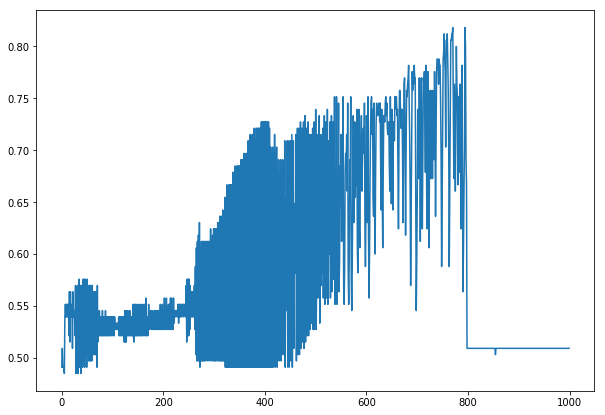

In [38]:
plt.figure(figsize=(10,7))
plt.plot(accuracy_history)
plt.show()

In [39]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.square(pred_y - Y_test))
print("Test Accuracy: ", (sess.run(y, feed_dict={x:X_test, y_:Y_test} )))

Test Accuracy:  [[ 1.00598848 -0.27480122]
 [ 0.37220466 -0.10167342]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.89151478 -0.51669633]
 [ 0.          0.        ]
 [ 0.40165958 -0.10971949]
 [ 2.52431583 -0.6895557 ]
 [ 1.68786907 -0.46106738]
 [ 2.1839695  -0.5965848 ]
 [ 1.24141967 -0.33911285]
 [ 0.          0.        ]
 [ 2.06629348 -0.56443983]
 [ 2.0714829  -0.62282556]
 [ 1.77212667 -0.48408362]
 [ 1.91593039 -0.52336586]
 [ 0.          0.        ]
 [ 1.87823737 -0.51306939]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.70424008 -0.46553937]
 [ 1.96880281 -0.53780872]
 [ 0.27101102 -0.07403082]
 [ 0.          0.        ]
 [ 0.11970146 -0.03269829]
 [ 0.17768888 -0.04853845]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 2.92844081 -0.79994857]
 [ 3.26225114 -0.89113402]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.32717466 -0.36253816]
 [ 2.41388154 -0.65938884]
 [ 0.63260734 -0.17280643]
 [ 0.9990872

In [40]:
pred_y = sess.run(y, feed_dict={x:X_test})
mse = tf.reduce_mean(tf.square(pred_y- Y_test))
print("MSE: %.4f" % sess.run(mse))

MSE: 0.6301
